<a href="https://colab.research.google.com/github/datbrowndude/polyp_classification_svm/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Early diagnosis of Breast Cancer significantly increases the chances of surviver.

*** The key challenges against it's detection is how to classify tumors into malignant(Cancer) or benign(not cancer).***
 
  A tumor is considered **malignant** if the cells can grow into surrounding tissues or spread to distant areas of the body. 
  
  A **benign** tumor does not invade nearby tissue or spread to other parts of the body the way cancer can. But benign tumors can be serious if they press on vital structures such as blood vessel or nerves.

### ***Machine Learning technique can dramatically improve the level of diagnosis in breast cancer. Research shows that experience physicians can detect cancer by 79% accuracy, while 91%(up to 97%) accuracy can be achieved using Machine Learning techniques.***


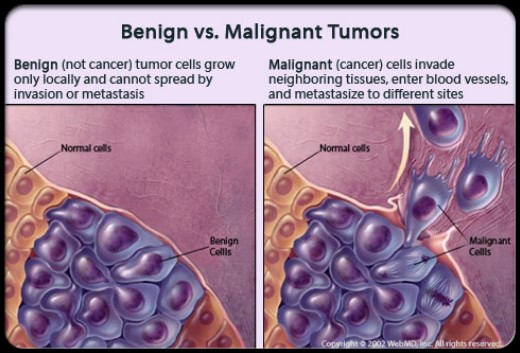

# **Project Task**

In this study, my task is to classify tumors into malignant (cancer) or benign using features obtained from several cell images.

Features are computed from a digitized image. They describe characteristics of the cell nuclei present in the image.

### **Attribute Information:**


1.    ID number
2.   Diagnosis (M = malignant, B = benign)

### **Ten real-valued features are computed for each cell nucleus:**

1. Radius (mean of distances from center to points on the perimeter)
2. Texture (standard deviation of gray-scale values)
3. Perimeter
4. Area
5. Smoothness (local variation in radius lengths)
6. Compactness (perimeter^2 / area - 1.0)
7. Concavity (severity of concave portions of the contour)
8. Concave points (number of concave portions of the contour)
9. Symmetry
10.Fractal dimension ("coastline approximation" - 1)





## **PART 1**
# Loading packages and data

***Import needed Python Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import Cancer data from the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


***Viewing Data in a dataframe***

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
df=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))
df.head(7) #displaying first 7 samples of the dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0


***VISUALISING the data***

Visualising how features correlate with each other. 

To do that we will take n features where n<30 and plot relationship with each other

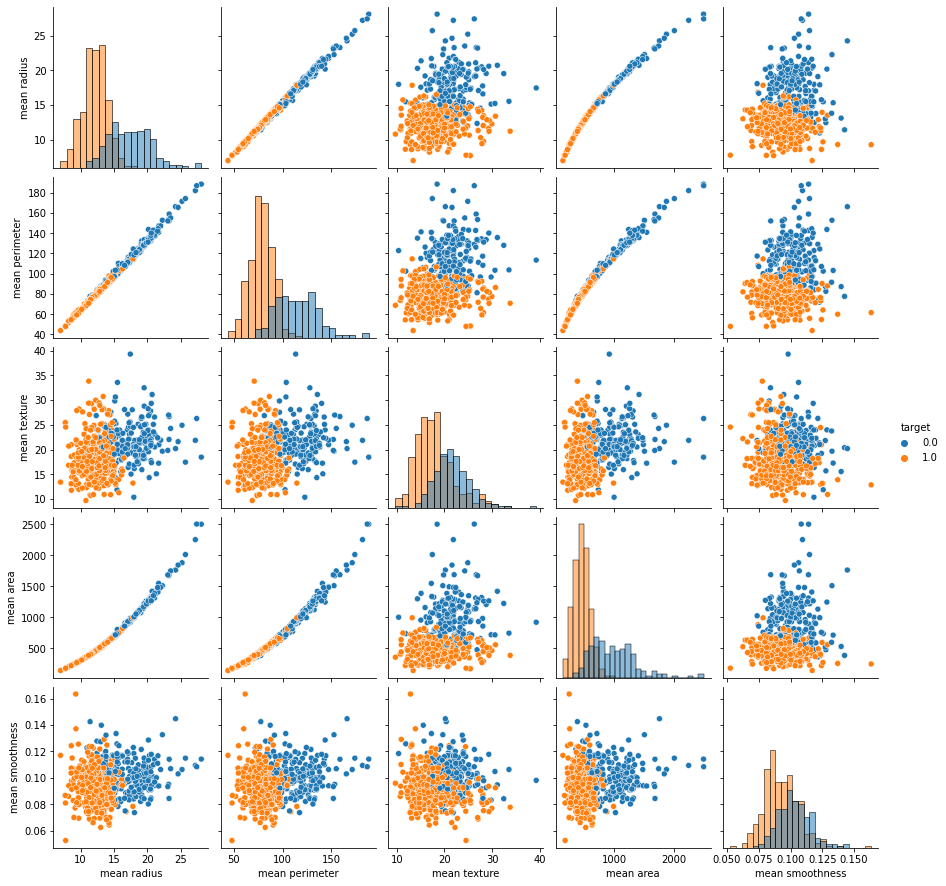

In [6]:
# plotting only five features

sns.pairplot(df,hue='target',vars=['mean radius','mean perimeter','mean texture','mean area','mean smoothness'],diag_kind='hist')

### Plotting the full correlation heatmap

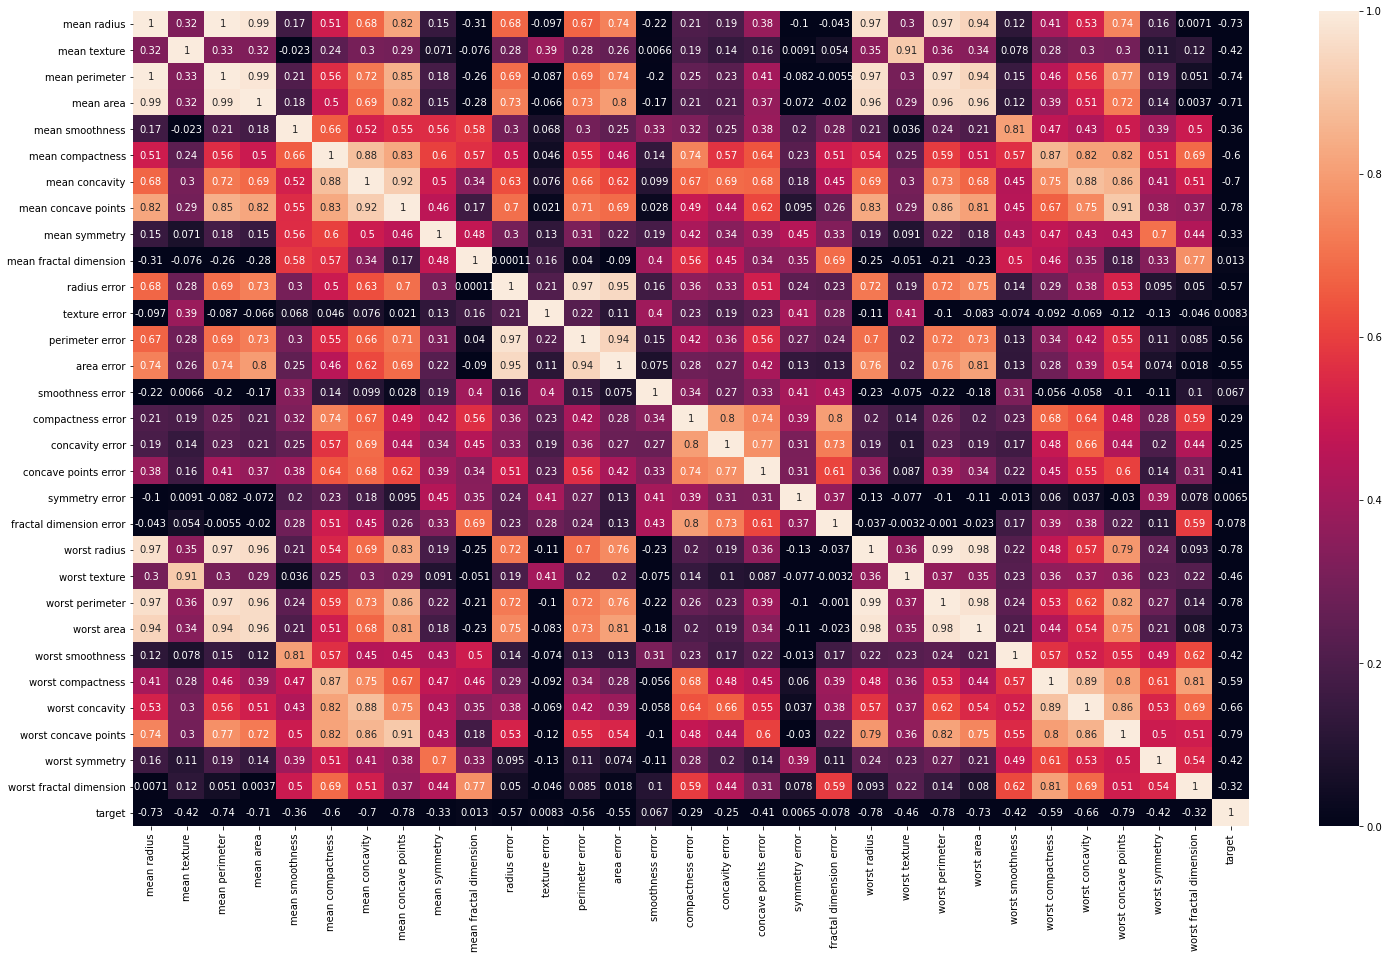

In [7]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True,)

*The black blocks represent parameters having least correlation with each other.*

*The white and lighter blocks have strong correlation with eah other*

# **PART 2**

## *Introduction to Classification Modeling: Suport Vector Maching (SVM)*


***Modeling***

*We attempt to make our understanding of relationships between different quantities more precise through using data and mathematical/statistical structures.*


**This process is called modeling.**


***Models are simplifications of reality that help us to better understand that which we observe.***


*In a data science setting, models generally consist of an independent variable (or output) of interest and one or more dependent variables (or inputs) believed to have an effect on the independent variable.*

***The advantages of support vector machines are:***


1. Effective in high dimensional spaces.

2. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

3. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels. 

***The disadvantages of support vector machines include:***

1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

## ***Model Training***

From our dataset, we create the target and predictor matrix

***y = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.***


***X = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc)***

In [8]:
X=df.drop(['target'],axis=1)
X.head(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [9]:
y=df['target']
y.head(7)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: target, dtype: float64

## ***Create the training and testing data***
Now that we've assigned values to our "X" and "y", the next step is to import the python library that will help us to split our dataset into training and testing data.

***Training data*** = Is the subset of our data used to train our model.


***Testing data*** = Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.

In [10]:
from sklearn.model_selection import train_test_split

**splitting training and testing data in 80% - 20% respectively**

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=40,shuffle=False)
#shuffle by default is true if shuffle is not initialised as false then the dataset is shuffled by default everytime and learinig is different

## ***Import Support Vector Machine (SVM) Model***

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC()

***Training/fitting SVM model with "training" dataset.***

In [14]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

***Using model to evaluate our testing data***

In [15]:
y_pred=model.predict(X_test)
#y.head(7)

# **PART 3**

### ***CHECKING ACCURACY***

***The confusion matrix***

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
cm=np.array(confusion_matrix(y_test,y_pred,labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,85,3
is_healthy,3,23


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        26
         1.0       0.97      0.97      0.97        88

    accuracy                           0.95       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.95      0.95      0.95       114



*The model did good. But this in case we get bad scores, the reason being the datasample format chosen didn't provide good learning, we can improve the accuracy by hyperparameter tuning. Which is the advantage of SVM*

# **PART 4**

## **Improving our Model** 

## ***a. DATA NORMALISATION BY FEATURE SCALING***

X' = (X-X_min) / (X_max - X_min)-----> X_range

In [19]:
X_train_min=X_train.min()
X_train_min

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.062510
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.116700
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [20]:
X_train_max=X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2499.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  525.60000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 33.13000
worst texture                49.54000
worst perimeter             229.30000
worst area                 3432.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [21]:
X_train_n=(X_train-X_train_min) / (X_train_max - X_train_min)
X_train_n.head(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.364042,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518,0.356147,0.120469,0.369034,0.282572,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.692460,0.141525,0.750126,0.564802,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.502017,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323,0.156437,0.082589,0.124440,0.129681,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.676984,0.303571,0.605903,0.545399,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449798,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247,0.229622,0.094303,0.180370,0.168135,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.620635,0.360075,0.570686,0.469324,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102993,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000,0.139091,0.175875,0.126655,0.039376,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.276984,0.385928,0.270893,0.117808,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,0.233822,0.093065,0.220563,0.168925,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.579762,0.123934,0.569009,0.428052,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,0.258839,0.202570,0.267984,0.141626,0.794379,0.461996,0.369728,0.402038,0.491191,0.551179,0.080753,0.117132,0.068793,0.039299,0.197063,0.234311,0.092727,0.215382,0.193730,0.144660,0.299206,0.312633,0.296216,0.171369,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,0.533343,0.347311,0.523875,0.380599,0.390802,0.274891,0.264058,0.367793,0.334757,0.157119,0.121383,0.091275,0.114169,0.090802,0.088418,0.086881,0.056919,0.196818,0.081725,0.044367,0.593254,0.416844,0.574599,0.437600,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853


In [22]:
X_test_n=(X_test-X_test.min()) / (X_test.max() - X_test.min())
X_test_n.head(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
455,0.288357,1.000000,0.276443,0.165966,0.359484,0.165748,0.077552,0.193250,0.235602,0.178440,0.093069,0.438001,0.084772,0.040520,0.166152,0.111349,0.071239,0.319944,0.173293,0.172269,0.232878,0.958727,0.214529,0.119591,0.246204,0.110261,0.059855,0.292943,0.202507,0.219491
456,0.199655,0.926440,0.193913,0.104994,0.369595,0.212987,0.196974,0.119420,0.552730,0.213066,0.081847,0.581065,0.077109,0.029678,0.376590,0.278658,0.383752,0.322993,0.482841,0.088765,0.162342,0.860790,0.160388,0.075476,0.457701,0.185019,0.249829,0.257925,0.423658,0.164132
457,0.279740,0.718621,0.260325,0.157685,0.318498,0.074356,0.076259,0.122439,0.418100,0.078717,0.038642,0.274416,0.030349,0.019303,0.162331,0.048851,0.135548,0.226113,0.099558,0.059534,0.207295,0.700595,0.187077,0.101553,0.351952,0.066387,0.118803,0.226604,0.282224,0.111571
458,0.269096,0.712449,0.249604,0.150090,0.280401,0.068924,0.033177,0.104322,0.454001,0.047553,0.060717,0.240788,0.049534,0.026051,0.177302,0.061585,0.050996,0.222082,0.054706,0.028939,0.206929,0.618398,0.185908,0.100461,0.287780,0.070064,0.038137,0.223434,0.237866,0.051101
459,0.104618,0.870370,0.099007,0.051703,0.245644,0.050531,0.042393,0.061753,0.419596,0.163666,0.026186,0.370458,0.026378,0.007526,0.205256,0.114775,0.130162,0.213950,0.176690,0.102407,0.072802,0.794683,0.068832,0.031337,0.190166,0.072025,0.061453,0.183623,0.242687,0.163037
460,0.475898,0.816358,0.455317,0.326311,0.418435,0.316929,0.277029,0.380758,0.548242,0.239612,0.334909,0.217989,0.295303,0.201789,0.317908,0.250250,0.244255,0.511041,0.336731,0.311800,0.521965,0.709689,0.496213,0.353414,0.633044,0.235634,0.225556,0.586792,0.464159,0.388003
461,1.000000,0.771091,1.000000,1.000000,0.503476,0.678216,1.000000,1.000000,0.748691,0.087719,1.000000,0.261877,1.000000,1.000000,0.260849,0.700642,0.723070,0.910620,0.218485,0.325538,1.000000,0.600560,1.000000,1.000000,0.413413,0.457701,0.584017,0.990566,0.345548,0.189317


In [23]:
model_improved=SVC()
model_improved.fit(X_train_n,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred_n=model_improved.predict(X_test_n)

In [25]:
cm=confusion_matrix(y_test,y_pred_n)
cm

array([[26,  0],
       [10, 78]])

In [26]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        26
         1.0       1.00      0.89      0.94        88

    accuracy                           0.91       114
   macro avg       0.86      0.94      0.89       114
weighted avg       0.94      0.91      0.92       114



***Observation: Normalising data didn't give better o/p than earlier. So time for hyperparameter tuning***

***The search for the optimal set of hyperparameters is called gridsearching.***

*Gridsearching gets its name from the fact that we are searching over a "grid" of parameters. For example, imagine the alpha hyperparameters on the x-axis and fit_intercept on the y-axis, and we need to test all points on the grid.*

Searching for the best hyperparameters....

## ***b. Gridsearch Model***

In [27]:
param_grid={'C': [0.1, 1,10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [30]:
grid.fit(X_train_n,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.593, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.582, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.593, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.593, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.593, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.593, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

**Print out the "grid" with the best parameter**

In [31]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [32]:
print(grid.best_score_)

0.9758241758241759


**The best parameters are C=1, gamma=0.1, and kernel=rbf**

In [33]:
after_tuning=grid.predict(X_test_n)

In [34]:
cm=confusion_matrix(y_test,after_tuning)
cm

array([[25,  1],
       [ 4, 84]])

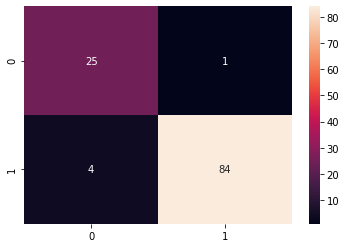

In [35]:
sns.heatmap(cm,annot=True)

In [36]:
print(classification_report(y_test,after_tuning))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        26
         1.0       0.99      0.95      0.97        88

    accuracy                           0.96       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.96      0.96      0.96       114



## ***As we can see the accuracy has improved to 96% after hyperparameter tuning***